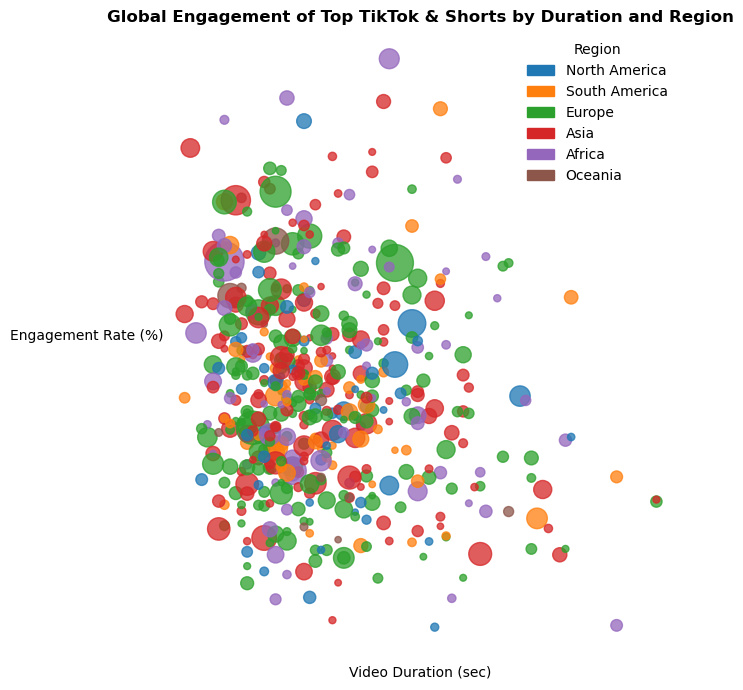

In [24]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

rows = []
with open('/Users/sdank/Downloads/youtube_shorts_tiktok_trends_2025.csv', 'r', encoding='utf-8', newline='') as f:
    reader = csv.DictReader(f)
    for r in reader:
        rows.append(r)

duration = np.array([float(r["duration_sec"]) for r in rows])
engagement_rate = np.array([float(r["engagement_rate"]) for r in rows])
engagement_total_raw = np.array([float(r["engagement_total"]) for r in rows])
region = [r["region"] for r in rows]

region_colors = {
    'North America': '#1f77b4',
    'South America': '#ff7f0e',
    'Europe': '#2ca02c',
    'Asia': '#d62728',
    'Africa': '#9467bd',
    'Oceania': '#8c564b',
}

colors = [region_colors.get(r, "#7f7f7f") for r in region]
mask = engagement_total_raw > 50000

duration = duration[mask]
engagement_rate = engagement_rate[mask]
engagement_total_raw = engagement_total_raw[mask]
colors = np.array(colors)[mask]
region = np.array(region)[mask]

min_size, max_size = 20, 800
et = engagement_total_raw
sizes = min_size + (et - et.min()) / (et.max() - et.min()) * (max_size - min_size)

fig, ax = plt.subplots(figsize=(7, 7))
sc = ax.scatter(duration, engagement_rate, s=sizes, c=colors, alpha=0.75)

pad_x = (duration.max() - duration.min()) * 0.05
pad_y = (engagement_rate.max() - engagement_rate.min()) * 0.05

ax.set_xlim(duration.min() - pad_x, duration.max() + pad_x)
ax.set_ylim(engagement_rate.min() - pad_y, engagement_rate.max() + pad_y)

legend_handles = [
    mpatches.Patch(color=region_colors[r], label=r)
    for r in region_colors
]

ax.legend(handles=legend_handles, title="Region", loc="upper right", frameon=False)

ax.set_title(
    "Global Engagement of Top TikTok & Shorts by Duration and Region",
    weight="bold",
)

ax.set_xlabel("Video Duration (sec)")
ax.set_ylabel("Engagement Rate (%)", rotation=0, labelpad=50)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis="both", which="both", length=0)

plt.tight_layout()
plt.show()